In [1]:
import pandas as pd
#Here we put encdoding as latin because some it containscharacters other than what supported in unicode system 
df_retail=pd.read_csv("data_reatail.csv",parse_dates=["InvoiceDate"],encoding="latin1")
df_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [2]:
#Lets chcek whether there are null values in the dataset or not
df_retail.isnull().sum()
#Therefore null values are present in two  columns "Description" and "CustomerID"

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
#Lets check the Datatypes of columns in dataset
df_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
#Since too much data is availabe with us so lets delete all rows where customer_id is not present
df_retail.dropna(inplace=True)

In [5]:
#Lets now chcek null values presence in the dataset
df_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
#Lets reset the index in the dataset
df_retail.reset_index(drop=True,inplace=True)

In [7]:
df_retail["total_amount"]=df_retail["Quantity"]*df_retail["UnitPrice"]

In [8]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
#Lets display the table showing total amount spent by a aparticular customer
df_expense=df_retail.groupby(["CustomerID"]).agg({"total_amount":"sum"})
df_expense

,total_amount
CustomerID,
12346.0,0.000000e+00
12347.0,4.310000e+03
12348.0,1.797240e+03
12349.0,1.757550e+03
12350.0,3.344000e+02
12352.0,1.545410e+03
12353.0,8.900000e+01
12354.0,1.079400e+03
12355.0,4.594000e+02


In [10]:
df_expense.sort_values(ascending=False,inplace=True,by=["total_amount"])

In [11]:
#Top 5 customers who did maximum amount of purchase
df_expense.head()

,total_amount
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45


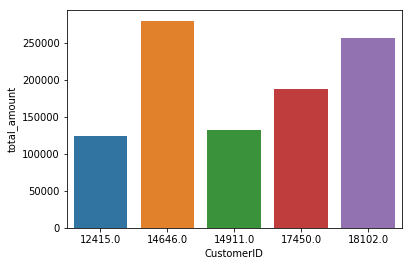

In [13]:
#Lets plot the above table graphically
import matplotlib.pyplot as plt
import seaborn as sns
df_expense["CustomerID"]=df_expense.index.to_list()
sns.barplot(x="CustomerID",y="total_amount",data=df_expense.head())
plt.show()

In [14]:
#country having highest amount of purchases
df_expense_country=df_retail.groupby(["Country"]).agg({"total_amount":"sum"})
df_expense_country

,total_amount
Country,
Australia,1.370773e+05
Austria,1.015432e+04
Bahrain,5.484000e+02
Belgium,4.091096e+04
Brazil,1.143600e+03
Canada,3.666380e+03
Channel Islands,2.008629e+04
Cyprus,1.294629e+04
Czech Republic,7.077200e+02


In [15]:
#Lets sort it in descending order
df_expense_country.sort_values(ascending=False,inplace=True,by=["total_amount"])

In [16]:
df_expense_country.head()

,total_amount
Country,
United Kingdom,6.767873e+06
Netherlands,2.846615e+05
EIRE,2.502852e+05
Germany,2.216982e+05
France,1.967128e+05


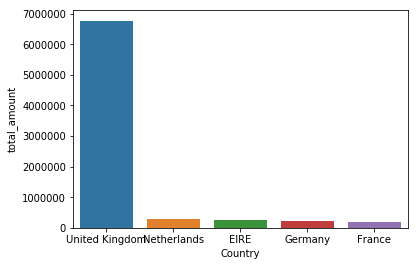

In [17]:
df_expense_country["Country"]=df_expense_country.index.to_list()
sns.barplot(x="Country",y="total_amount",data=df_expense_country.head())
plt.show()

In [18]:
#Lets chcek the count of orders that got cancelled
#mentioned in the dataset that innvoice preceeded by c means the order got cancelled
df_retail.loc[df_retail["InvoiceNo"].str[0]=="C"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,-41.40
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-39.60
938,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,-25.50


In [19]:
#Lets biing the new column of order  cancelled or not
import numpy as np
df_retail["order_cancel"]=np.where(df_retail["InvoiceNo"].str[0]=="C",1,0)

In [20]:
#Since we have made an extra column for order cancelled or not so lets drop "C" in first column
df_retail["InvoiceNo"]=df_retail["InvoiceNo"].str.lstrip(to_strip="C")

In [21]:
#lets display the dataset where orders are cancelled
df_retail.loc[df_retail["order_cancel"]==1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,order_cancel
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,1
154,536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,1
235,536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,1
236,536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1
237,536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1
238,536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1
239,536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,-41.40,1
240,536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,1
241,536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-39.60,1
938,536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,-25.50,1


In [22]:
#This will delete all the rows which have same order again with some other innvoice
df_cancelled=df_retail.loc[df_retail["order_cancel"]==1][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
for index,col in df_cancelled.iterrows():
    if df_retail[(df_retail['CustomerID'] == col[0]) & (df_retail['Quantity'] == -col[1]) 
                & (df_retail['Description'] == col[3])].shape[0] > 0:
        df_retail.drop(index,inplace=True)

In [23]:
#lets chcek the shape of df_retail
df_retail.loc[df_retail["order_cancel"]==1].shape
#So we some size has reduced by 3000 i.e there existed 3000 counter orders for cancelled one

(5661, 10)

In [24]:
#Lets extract the year from invoice date
df_retail["year"]=df_retail["InvoiceDate"].dt.year

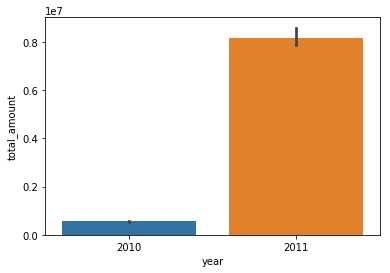

In [25]:
#lets check in which year average amount  of purchase was more
sns.barplot(x="year",y="total_amount",estimator=sum,data=df_retail)
plt.show()

In [26]:
#Lets check count of item buyed in a country
df_retail.groupby(["StockCode","Country"]).agg({"StockCode":"count"})
#From this table we can get popular items in a country or least popular by sorting

StockCode
StockCode Country                        
10002     EIRE                          1
          France                        8
          Germany                       1
          Japan                         1
          Spain                         1
          Switzerland                   1
          United Kingdom               36
10080     United Kingdom               21
10120     France                        1
          United Kingdom               29
10123C    United Kingdom                3
10124A    United Kingdom                5
10124G    United Kingdom                4
10125     France                        6
          Germany                       6
          Switzerland                   1
          United Kingdom               51
10133     Canada                        2
          EIRE                          2
          Israel                        1
          Portugal                      1
          Switzerland                   1
          United Kingdom              117
10135     Canada                        1
          EIRE                          1
          France                        1
          Germany                       1
          Norway                        1
          United Kingdom              117
11001     EIRE                          3
...                                   ...
M         Portugal                      7
          RSA                           1
          Singapore                     7
          Spain                         3
          Sweden                        1
          United Kingdom              353
PADS      United Kingdom                4
POST      Australia                     1
          Austria                      14
          Belgium                      97
          Canada                        1
          Cyprus                        1
          Czech Republic                1
          Denmark                      14
          European Community            3
          Finland                      38
          France                      304
          Germany                     376
          Greece                        4
          Italy                        17
          Malta                         4
          Netherlands                  38
          Norway                       20
          Poland                        5
          Portugal                     30
          Spain                        62
          Sweden                       22
          Switzerland                  31
          United Arab Emirates          1
          United Kingdom               83

[18981 rows x 1 columns]

In [27]:
#lets chcek the columns
df_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'total_amount', 'order_cancel',
       'year'],
      dtype='object')

In [28]:
#Going forward lets try to cluster the the data based on decription instead of  StockCode
#Lets drop the columns "InvoiceNo","StockCode","InvoiceDate"
df_retail.drop(columns=["InvoiceNo","StockCode","InvoiceDate"],inplace=True)

In [29]:
#lets chcek the value counts of country
#And replace the less country names by other if they are occuring less than 300 times inn dataset
#This is donne to reduce the number of columns when we will use pd.get_dummies function
df_country_counts=df_retail["Country"].value_counts()
for index in df_country_counts.index:
    if df_country_counts.loc[index]<300:
        df_retail["Country"].replace(index,"other",inplace=True)

In [30]:
#Now lets process the description column so that we can use it in K means
#Below function we will use to clean the Description column
import re
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
stop_words=list(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() #Initialising the lemmatizer
def clean(text):
    newstring=""
    text=re.sub("[\W*]"," ",text)
    text=re.sub("\d+[a-z]*"," ",text)
    text=re.sub("\s+"," ",text)
    count=0
    for word in text.split():
        if word not in stop_words:
            word=lemmatizer.lemmatize(word)
            if count==0:
                newstring=newstring+word
            if count!=0:
                newstring=newstring+" "+word
            count=count+1
    return newstring

In [31]:
df_retail["Description"]=df_retail["Description"].apply(lambda x: clean(x))

In [32]:
#Lets use tf-idf to convert Description into integers
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
desc = vectorizer.fit_transform(df_retail["Description"].to_list())
desc.shape

(403585, 1000)

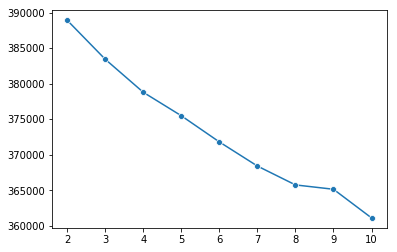

In [33]:
#Now we will use unsupervised K means clustering algorithm to find the clusters
from sklearn.cluster import KMeans
inertia_list=list()
for cluster in range(2,11):
    km=KMeans(n_clusters=cluster)
    km.fit(desc)
    inertia_list.append(km.inertia_)
sns.lineplot(x=range(2,11),y=inertia_list,marker='o')
plt.show()
#We can see below change is consant between 6 to 9 ,so lets choose number of clusters as 8

In [36]:
#so making the final model
km=KMeans(n_clusters=6)
km.fit(desc)
y_pred=km.predict(desc)

In [37]:
y_pred=pd.DataFrame(y_pred,columns=["target"])
df_final=pd.concat([df_retail,y_pred],axis=1)
df_final
#Hence we have made clusters foor the dataset
#NOTE:Would have done more but the dataset is huge so execution is taking lot of time

,Description,Quantity,UnitPrice,CustomerID,Country,total_amount,order_cancel,year,target
0,WHITE HANGING HEART T LIGHT HOLDER,6.0,2.55,17850.0,United Kingdom,15.30,0.0,2010.0,5.0
1,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom,20.34,0.0,2010.0,1.0
2,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,17850.0,United Kingdom,22.00,0.0,2010.0,1.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,United Kingdom,20.34,0.0,2010.0,1.0
4,RED WOOLLY HOTTIE WHITE HEART,6.0,3.39,17850.0,United Kingdom,20.34,0.0,2010.0,5.0
5,SET BABUSHKA NESTING BOXES,2.0,7.65,17850.0,United Kingdom,15.30,0.0,2010.0,1.0
6,GLASS STAR FROSTED T LIGHT HOLDER,6.0,4.25,17850.0,United Kingdom,25.50,0.0,2010.0,5.0
7,HAND WARMER UNION JACK,6.0,1.85,17850.0,United Kingdom,11.10,0.0,2010.0,1.0
8,HAND WARMER RED POLKA DOT,6.0,1.85,17850.0,United Kingdom,11.10,0.0,2010.0,3.0
9,ASSORTED COLOUR BIRD ORNAMENT,32.0,1.69,13047.0,United Kingdom,54.08,0.0,2010.0,1.0
